In [45]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [46]:
myopia_df = pd.read_csv("myopia.csv")
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [47]:
myopia_df["MYOPIC"].nunique()

2

In [48]:
labels = myopia_df['MYOPIC']
labels.value_counts().nunique()

2

In [49]:
myopia_df.shape

(618, 15)

In [50]:
myopia_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [54]:
myopia_df.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [51]:
# Remove the "MYOPIC" column from the dataset.
labels = myopia_df['MYOPIC']
myopia = myopia_df.drop(columns = ['MYOPIC'])
myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [52]:
scaler = StandardScaler()
myopia_scaled = scaler.fit_transform(myopia)
print(myopia_scaled)

[[-4.20219106e-01 -1.36391690e+00 -8.92861464e-01 ...  4.98303926e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -3.08612235e-01 -1.71839800e-01 ... -8.75087555e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01  6.04386289e-01 -9.97682023e-03 ... -7.50233784e-01
  -1.01302987e+00 -9.96768974e-01]
 ...
 [-4.20219106e-01  1.65169621e+00  6.52187361e-01 ... -1.37450264e+00
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -2.17472219e-01 -8.48716244e-01 ... -1.88391815e-01
  -1.01302987e+00 -9.96768974e-01]
 [-4.20219106e-01  1.58339808e-03 -3.48415042e-01 ... -7.50233784e-01
   9.87137728e-01  1.00324150e+00]]


# Part 2: Apply Dimensionality Reduction

In [53]:
# Part 2: Apply Dimensionality Reduction

 * **Hint:** Rather than specify the number of principal components when you instantiate the PCA model, state the desired **explained variance**. For example, say that a dataset has 100 features. Using `PCA(n_components=0.99)` creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.

In [38]:
pca = PCA(n_components = 0.90)
myopia_pca = pca.fit_transform(myopia_scaled)

In [14]:
myopia_pca.shape

(618, 10)

In [15]:
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [16]:
sum(pca.explained_variance_ratio_)

0.9187361702915187

Performed a dimensionality reduction with PCA features were reduced from 14 to 10 with 618 samples

In [17]:
# Initialize t-SNE model
tsne = TSNE(perplexity=30, learning_rate=25, random_state=42)

In [18]:
# reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

In [40]:
tsne_features.shape

(618, 2)

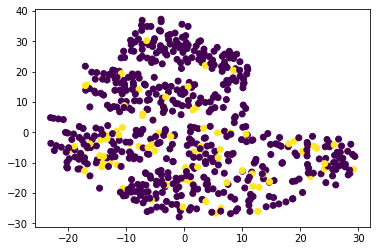

In [19]:
# Create scatter plot.
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

no distinct clusters after the t-SNE analysis

# Part 3: Perform a Cluster Analysis with K-means

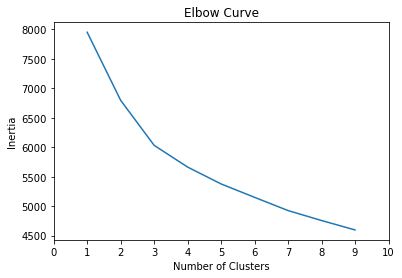

In [35]:
# Finding the best value for k
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Plot the elbow curve to find the best candidate(s) for k
plt.plot( k, inertia)
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [36]:
len(pca.components_)

10

In [34]:
# Creating the Elbow Curve
Elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(Elbow_data)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


In [27]:
km = KMeans(n_clusters = 3)
km.fit(myopia_pca)
predicted_clusters = km.predict(myopia_pca)

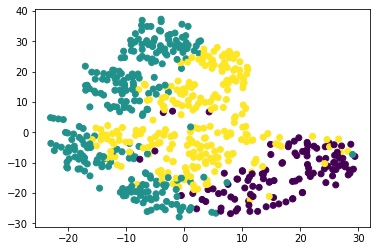

In [23]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=predicted_clusters)
plt.show()

# Part 4: Make a Recommendation

There was 618 samples with 14 variables. After reducing the dimensions, we were left with 618 samples with 2 components. The patients seem to be able to be clustered in to 3 maybe 4 clusters in this dataset ,(I'm a litle color blind haha) we can also use "group" to devide the paients and look at them individually an look more closly at our data set and improve the modle with more testing with additional dimensions we could also show definitive clusters to determine if patients are myopic or not.

In [56]:
myopia_df['GROUP'] = predicted_clusters
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,GROUP
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1,2
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0,2
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1,2
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0,1
